In [8]:
# user inputs
symbol = "SBIN"
series = "EQ"
yr = 3 # number of years of data
k = 50 # differencing

In [2]:
# import packages
import pandas as pd
import datetime as dt
from nsepython import *
import warnings
warnings.filterwarnings('ignore')

In [3]:
# get latest data
this_data = pd.DataFrame()
end_date = dt.date.today()

for i in range(yr):
    start_date = end_date - dt.timedelta(days = 364)
    this_data = pd.concat([equity_history(symbol,series,start_date.strftime("%d-%m-%Y"),end_date.strftime("%d-%m-%Y")), this_data])
    end_date = start_date - dt.timedelta(days = 1)

In [4]:
# UDF k -diff
def get_k_diff(x, k):
    for i in range(k):
        x = x.diff()
    return x

In [9]:
# create differences
this_stock_data = this_data[['CH_TIMESTAMP', 'CH_CLOSING_PRICE']].set_index('CH_TIMESTAMP')
this_stock_data.sort_values(by='CH_TIMESTAMP', axis=0, ascending=True, inplace=True)
this_stock_data['Diff_'+ str(k)] = get_k_diff(this_stock_data['CH_CLOSING_PRICE'], k)

numpy.ndarray

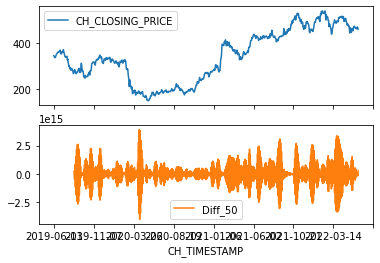

In [10]:
# plot
axes = this_stock_data[['CH_CLOSING_PRICE','Diff_'+ str(k)]].plot.line(subplots=True)
type(axes)